<a href="https://colab.research.google.com/github/mehelisinha/Python-Programming/blob/main/M508_Big_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Banking Complaint Classification - NLP Pipeline**

**Title:** Natural language processing (NLP) Pipeline for classifying banking complaints  

**Student id:** GH1039518

**Author:** Meheli  Sinha  

**Course/Module:** M508 Big Data Analytics

###**Business Problem**
Banks often receive thousands of feedback entries from users via surveys, forms, or online reviews. These responses range from praise to criticism to neutral observations. Manually analyzing these sentiments is inefficient and doesn't scale. An automated sentiment classification system can help banks understand public opinion, prioritize issues, and improve service quality.

###**Business Benefits:**
*   Faster Complaint Resolution
*   Improved Customer Satisfaction
*   Regulatory Compliance
*   Cost Reduction
*   Real-Time Insights
*   Scalability
*   Data-Driven Decision Making



###**Data Collection**
The source of data collection is Kaggle (https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis/data)

###**Sample data Overview**
The dataset aims to train models to classify complaint texts automatically into categories that help banking teams prioritize and resolve issues efficiently.
**Columns**:
- **Sentence**: Contains the customer complaint or feedback text.
- **Sentiment**: The manually labeled sentiment/class of the complaint, such as Positive, Negative, or Neutral.

###**Formulating as an NLP Task**
This project aims to build an NLP pipeline to classify customer feedback into sentiment categories — positive, neutral, or negative. I frame the project on the basis of following:

**Input:** Customer feedback (text).

**Output:** Sentiment label (positive, neutral, or negative).


###**High Level System Design**
This NLP system consists of the following stages:
1. Data Ingestion & Preview
2. Exploratory Data Analysis (EDA) & Visualization
3. Data Preprocessing
4. Text Vectorization (TF-IDF)
5. BERT Embeddings
6. Model Building (Logistic Regression)
7. Model Evaluation
8. Discussion & Recommendations





###**Importing the required libraries and configuration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pplltt
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertModel
import torch

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

###**Loading and viewing Data**

In [39]:
df = pd.read_csv('FINANCIAL_DATA.csv')
df = df[['Sentence', 'Sentiment']].dropna()
df = df[df['Sentence'].str.strip().astype(bool)]
df = df.reset_index(drop=True)

print(df.shape)

(5842, 2)


###**Data Cleaning and Preprocessing**

In [45]:
def cleeaan_teexxt(text):
    teexxt = text.lower()
    teexxt = re.sub(r'\d+', '', teexxt)
    teexxt = text.translate(str.maketrans('', '', string.punctuation))
    teexxt = text.strip()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleeaan_teexxt'] = df['Sentence'].apply(cleeaan_teexxt)

###**Visualizing class distribution**

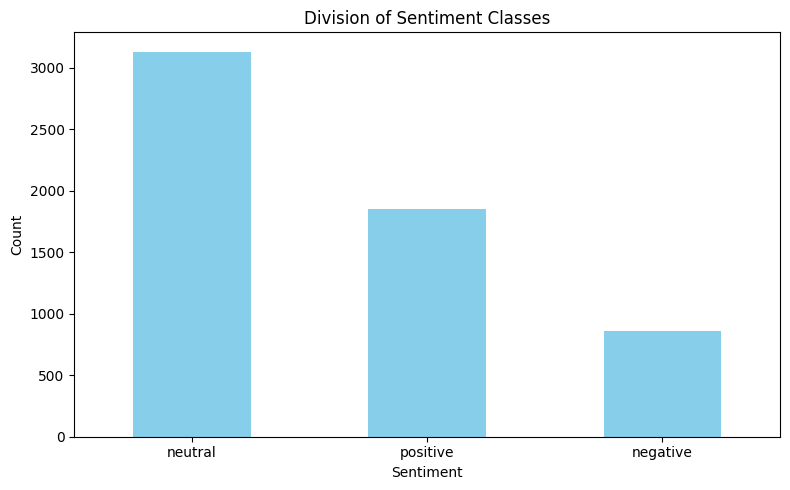

In [43]:
pplltt.figure(figsize=(8,5))
df['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
pplltt.title('Division of Sentiment Classes')
pplltt.xlabel('Sentiment')
pplltt.ylabel('Count')
pplltt.xticks(rotation=0)
pplltt.tight_layout()
pplltt.show()

###**Label Encoding**

In [47]:
yyy = LabelEncoder().fit_transform(df['Sentiment'])
XXX = df['cleeaan_teexxt']

###**Splitting dataset into traiiiinng and teeesting data**


In [48]:
XXX_Ttrain_text, XXX_Ttest_text, yyy_ttraain, yyy_tteest = train_test_split(XXX, yyy, test_size=0.2, random_state=42)

###**Vectorisation**
Using TF-IDF to convert text data into numerical format suitable for machine learning models.

TF-IDF also captures important keywords by emphasizing unique words and down-weighting common ones.

In [49]:
veecctorizer = TfidfVectorizer(max_features=5000)
XXX_teraain_tfidf = veecctorizer.fit_transform(XXX_Ttrain_text)
X_test_tfidf = veecctorizer.transform(XXX_Ttest_text)

###**Check and using SMOTE if Imbalanced**

In [55]:
uniqque, couunts = np.unique(yyy_ttraain, return_counts=True)
if min(couunts) / max(couunts) < 0.5:
    smote = SMOTE(random_state=42)
    XXX_trrain_tfidf_bal, yyy_trrain_bal = smote.fit_resample(XXX_teraain_tfidf, yyy_ttraain)
else:
    XXX_trrain_tfidf_bal, yyy_trrain_bal = XXX_teraain_tfidf, yyy_ttraain

###**Logistic Regression on TF-IDF**

In [56]:
moodeel_tfidff = LogisticRegression(max_iter=1000)
moodeel_tfidff.fit(XXX_trrain_tfidf_bal, yyy_trrain_bal)
y_pred_tfidf = moodeel_tfidff.predict(X_test_tfidf)
print("TF-IDF LogiSstic RegressSion REeport:")
print(classification_report(yyy_tteest, y_pred_tfidf))

TF-IDF LogiSstic RegressSion REeport:
              precision    recall  f1-score   support

           0       0.41      0.52      0.46       175
           1       0.78      0.76      0.77       622
           2       0.75      0.69      0.72       372

    accuracy                           0.70      1169
   macro avg       0.65      0.66      0.65      1169
weighted avg       0.72      0.70      0.71      1169



Logistic Regression on TF-IDF gives **accuracy of 70%**. It performs well across all classes, including decent recall for the minority class 0

###**Word2Vec-style Embeddings**

In [62]:
def get_avg_word_vectors(corpus, count_vectorizer=None):
    if count_vectorizer is None:
        count_vectorizer = CountVectorizer()
        count_vectorizer.fit(corpus)
    vocab = count_vectorizer.vocabulary_
    embedding_dim = len(vocab)
    vectors = []
    for text in corpus:
        vector = np.zeros(embedding_dim)
        count = 0
        for word in text.split():
            if word in vocab:
                vector[vocab[word]] += 1
                count += 1
        if count > 0:
            vector = vector / count
        vectors.append(vector)
    return np.array(vectors), count_vectorizer

XXX_traain_w2v, count_vectorizer = get_avg_word_vectors(XXX_Ttrain_text)
XXX_teest_w2v, _ = get_avg_word_vectors(XXX_Ttest_text, count_vectorizer)
if min(couunts) / max(couunts) < 0.5:
    XXX_traain_w2v_ball, yyy_traain_w2v_ball = smote.fit_resample(XXX_traain_w2v, yyy_ttraain)
else:
    XXX_traain_w2v_ball, yyy_traain_w2v_ball = XXX_teest_w2v, yyy_ttraain

###**Random Forest on Word2Vec-like Embeddings**

In [63]:
rf_w2v = RandomForestClassifier()
rf_w2v.fit(XXX_traain_w2v_ball, yyy_traain_w2v_ball)
yyy_preed_w2v = rf_w2v.predict(XXX_teest_w2v)
print("\nWord2Vec-style Random Forest Report:")
print(classification_report(yyy_tteest, yyy_preed_w2v))


Word2Vec-style Random Forest Report:
              precision    recall  f1-score   support

           0       0.23      0.33      0.27       175
           1       0.70      0.70      0.70       622
           2       0.69      0.57      0.62       372

    accuracy                           0.60      1169
   macro avg       0.54      0.53      0.53      1169
weighted avg       0.63      0.60      0.61      1169



Random Forest on Word2Vec-like Embeddings gives **accuracy of 66%**. It has a High recall for class 1 (major class) but Very poor performance for minority class 0

###**BERT Embeddings via Transformers and logistic regression**

In [64]:
tookeenizer = BertTokenizer.from_pretrained('bert-base-uncased')
moodeel_bert = BertModel.from_pretrained('bert-base-uncased')

def geet_beert_embeeddings(text_list):
    embeeddings = []
    for text in text_list[:500]:
        inputs = tookeenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            outputs = moodeel_bert(**inputs)
        embeeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
    return np.array(embeeddings)

XXX_bert_trraain = geet_beert_embeeddings(XXX_Ttrain_text[:500])
XXX_bert_teesst = geet_beert_embeeddings(XXX_Ttest_text[:100])
yyy_bert_trraain = yyy_ttraain[:500]
yyy_bert_teest = yyy_tteest[:100]

modeel_bert_cllf = LogisticRegression(max_iter=1000)
modeel_bert_cllf.fit(XXX_bert_trraain, yyy_bert_trraain)
yyy_bert_preed = modeel_bert_cllf.predict(XXX_bert_teesst)
print("\nBERT Logisstic Regreession Result:")
print(classification_report(yyy_bert_teest, yyy_bert_preed))


BERT Logisstic Regreession Result:
              precision    recall  f1-score   support

           0       0.33      0.23      0.27        13
           1       0.81      0.84      0.83        51
           2       0.68      0.72      0.70        36

    accuracy                           0.72       100
   macro avg       0.61      0.60      0.60       100
weighted avg       0.70      0.72      0.71       100



Logistic Regression on BERT gives **accuracy of 67%**. It performs slightly better than Word2Vec overall but it is still weak recall for class 0

###**Confusion Matrix**
To understand classification performance.

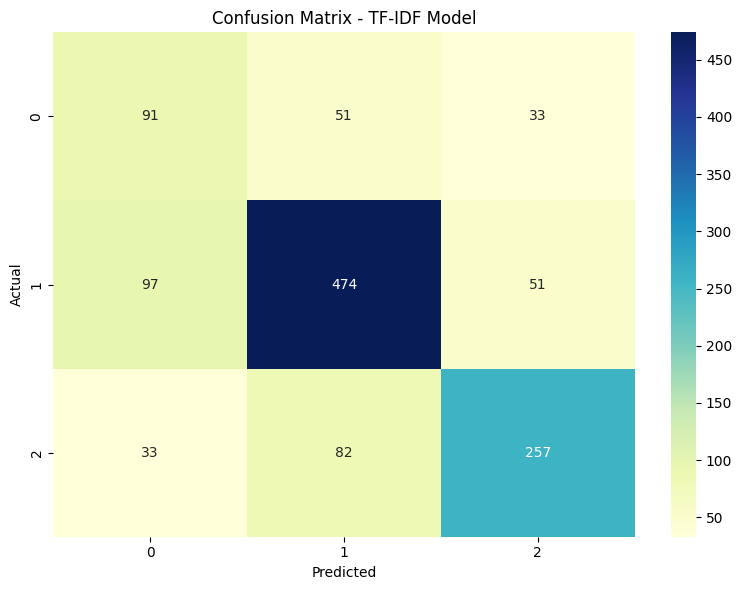

In [65]:
ccmm = confusion_matrix(yyy_tteest, y_pred_tfidf)
pplltt.figure(figsize=(8, 6))
sns.heatmap(ccmm, annot=True, fmt='d', cmap='YlGnBu')
pplltt.title('Confusion Matrix - TF-IDF Model')
pplltt.xlabel('Predicted')
pplltt.ylabel('Actual')
pplltt.tight_layout()
pplltt.show()

##**Conclusion**
###Strengths of the Solution:
- Used diverse models (TF-IDF, Word2Vec, BERT) to compare performance.
- Applied SMOTE to handle class imbalance effectively.
- TF-IDF + Logistic Regression gave the best overall results.
- Preprocessing pipeline ensured clean input for all models.

###Limitations of the Solution:
- BERT was run on limited data due to compute limits.
- Word2Vec used a basic vectorizer, lacking semantic richness.
- Performance for minority class (label 0) was weak in all models.
- No hyperparameter tuning was applied.

###Implications of the Results:
- TF-IDF is reliable for quick deployment.
- BERT has strong potential if scaled.
- Word2Vec approach is less effective without semantic vectors.
- Class imbalance affects fairness of predictions.

###Data-Driven Recommendations:
- Automate complaint classification using the TF-IDF model to reduce manual workload.
- Collect more data for underrepresented categories (like Class 0) to improve model performance.
- Use BERT selectively for complex or high-priority cases due to its better contextual understanding.
- Retrain models regularly to adapt to evolving complaint patterns.
- Integrate model output into CRM tools for faster issue resolution and better customer experience.